# Exploratory Data Anlaysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<AxesSubplot:xlabel='loan_status', ylabel='count'>

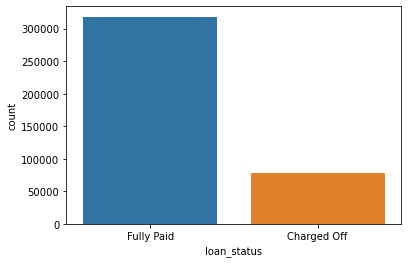

In [5]:
sns.countplot(x='loan_status',data=df)

In [6]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [8]:
#Changing the Loan status as 0 if the borrower has not payed off and 1 if the borrower payed off.
df['loan_status'] = df['loan_status'].map(
                   {'Fully Paid':1 ,'Charged Off':0})

In [9]:
df.corr()['loan_status']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
loan_status             1.000000
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
Name: loan_status, dtype: float64

<AxesSubplot:>

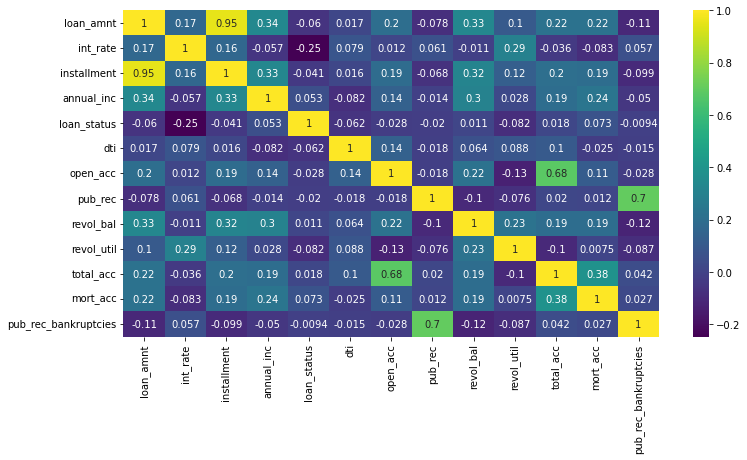

In [10]:
#visualising the heat map based on correlations
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

C:\Users\Dilee\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

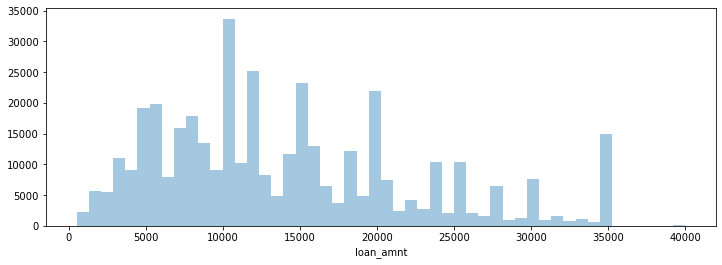

In [11]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

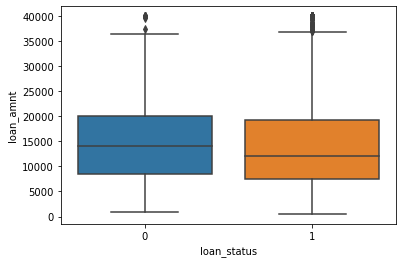

In [12]:
# Relation between Loan Amount and Loan Status
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
#Looks Like similar and larger loans are harder to pay than a smaller one: This is True in every case

In [13]:
df.groupby(df['loan_status'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
1,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

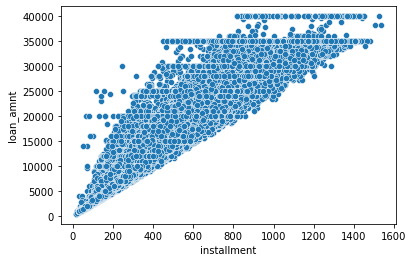

In [14]:
#Installments vs Laon Amount
sns.scatterplot(x='installment',y='loan_amnt',data=df)

In [15]:
#So the Relation is linear with installments vs loan amount

In [16]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [17]:
df.head()['term']

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [18]:
# Grades and subgrades
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

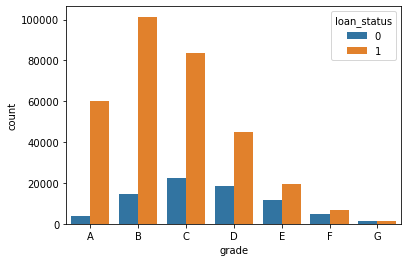

In [20]:
sns.countplot(x='grade',data=df,hue='loan_status',order=['A','B',"C",'D',"E",'F','G'])
#this is obvious that Grade A people has best fullypaid and charged off ratio and Grade G has the worst ratio

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

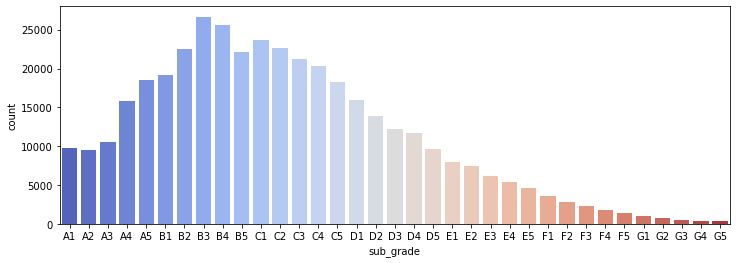

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,order=sorted(df['sub_grade'].unique()),palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

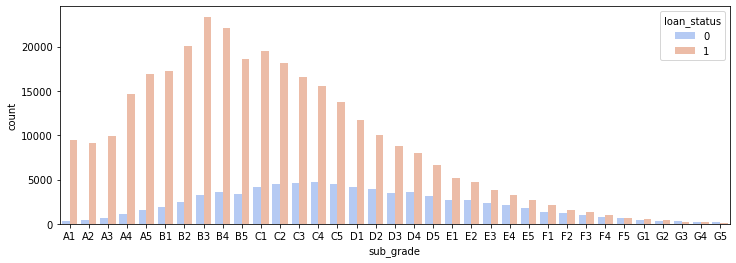

In [22]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,order=sorted(df['sub_grade'].unique()),palette='coolwarm',hue='loan_status')

<AxesSubplot:>

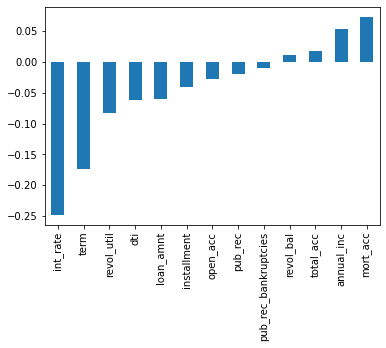

In [23]:
#Realation between Numeric Features to loan Repaid.

df.corr()['loan_status'].sort_values().drop(['loan_status']).plot(kind='bar')


# Data Pre-Processing

In [24]:
#Dealing with Missing Data
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [25]:
len(df)

396030

In [26]:
#Percentage of missing data
df.isnull().sum()*100/(len(df))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [27]:
#Examining emp_title and emp_length to see whether it will be okay to drop them or not
df['emp_title'].nunique()

173105

In [28]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [29]:
#As there are many employee titles available i.e.173,105 we can delete this column 
df=df.drop('emp_title',axis=1)

In [30]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [31]:
sorted_emp_length = ['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

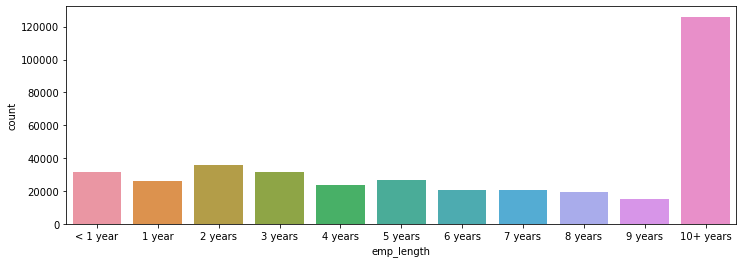

In [32]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=sorted_emp_length)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

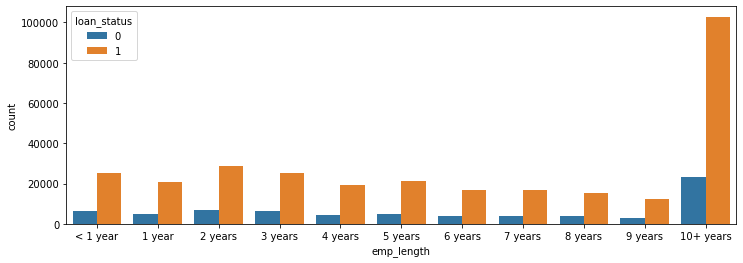

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=sorted_emp_length,hue='loan_status')

In [34]:
emp_charged_off = df[(df['loan_status']==0)].groupby('emp_length').count()['loan_status']

In [35]:
emp_fully_paid = df[(df['loan_status']==1)].groupby('emp_length').count()['loan_status']

In [36]:
emp_percentage = emp_charged_off/(emp_fully_paid+emp_charged_off)

<AxesSubplot:xlabel='emp_length'>

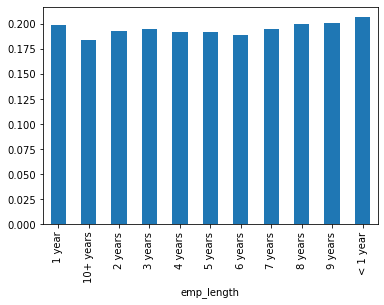

In [37]:
emp_percentage.plot(kind='bar')

In [38]:
#Charge off rates are extremely similar across all employment lengths, So we delete the employee length column
df=df.drop('emp_length',axis=1)

In [39]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [40]:
#We deal with Title column
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [41]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [42]:
#As this is just a description of the purpose column we can delete title column
df = df.drop('title',axis=1)

In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [44]:
#We move to mort_acc as the missing data is almost 10 percent
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [45]:
df.corr()['mort_acc']

loan_amnt               0.222315
term                    0.096220
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
loan_status             0.073111
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
Name: mort_acc, dtype: float64

In [46]:
#It has a good co-relation with total accounts

total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [47]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [48]:
# Filling the missing data according to the ratio based on the above cell
def fill_mort_acc_value(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [49]:
#applying the above data to our dataset
df['mort_acc'] = df.apply(lambda x: fill_mort_acc_value(x['total_acc'],x['mort_acc']),axis=1)

In [50]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [51]:
#Since the missing data is very small in number, we can drop the values of that particular feature
df = df.dropna()

In [52]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

# Categorical Variables and Dummy Variables 
Now we deal with string data.
So we list all the features based on non-numeric values

In [53]:
df.select_dtypes(['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [54]:
#We already know that grade is a part of subgrade, So we will delete the column
df=df.drop('grade',axis=1)

In [55]:
#Dealing with subgrade
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [56]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [57]:
dummies = pd.get_dummies(df[['verification_status','initial_list_status','application_type','purpose']],drop_first=True)
df=pd.concat([df.drop(['verification_status','initial_list_status','application_type','purpose'],axis=1),dummies],axis=1)

In [58]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],


In [59]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [60]:
df['home_ownership']= df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [61]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [62]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [63]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'],
 

In [64]:
df['address'].head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [65]:
df['address'] = df['address'].apply(lambda address:address[-5:])

In [66]:
df['address'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: address, dtype: int64

In [67]:
dummies = pd.get_dummies(df['address'],drop_first=True)
df=pd.concat([df.drop('address',axis=1),dummies],axis=1)

In [68]:
#issue_d is The month which the loan was funded
#So no use of this column
df=df.drop('issue_d',axis=1)

In [69]:
#earliest_cr_line is the date at which the loan was given, So we can ignore this as well as this does
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [70]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

<AxesSubplot:xlabel='earliest_cr_line', ylabel='count'>

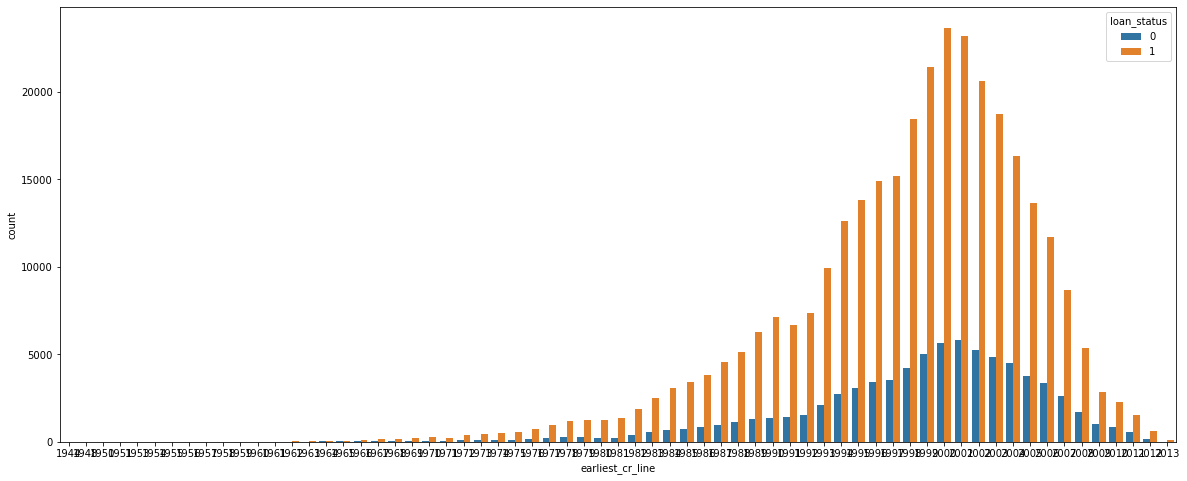

In [71]:
plt.figure(figsize=(20,8))
sns.countplot(x='earliest_cr_line',data=df,hue='loan_status')

In [72]:
emp_charged_off_earliest_cr_line = df[(df['loan_status']==0)].groupby('earliest_cr_line').count()['loan_status']

In [73]:
emp_paid_off_earliest_cr_line = df[(df['loan_status']==1)].groupby('earliest_cr_line').count()['loan_status']

In [74]:
emp_percentage_earliset_cr_line = emp_charged_off_earliest_cr_line/(emp_charged_off_earliest_cr_line+emp_paid_off_earliest_cr_line)

<AxesSubplot:xlabel='earliest_cr_line'>

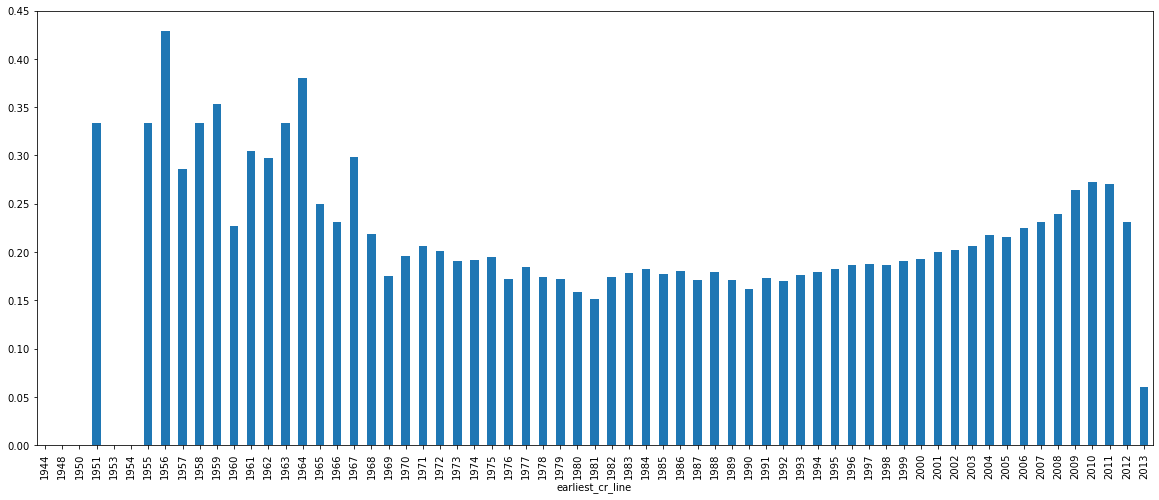

In [75]:
plt.figure(figsize=(20,8))
emp_percentage_earliset_cr_line.plot(kind='bar')

In [76]:
df['earliest_cr_line'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_line, dtype: int64

# TRAIN TEST SPLIT
So all the data is ready to train 

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = df.drop('loan_status',axis=1).values
y=df['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [79]:
#Normalising the data
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

In [81]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [83]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(units=1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

In [85]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)

In [86]:
model.fit(x=X_train,y=y_train,epochs=200,batch_size=256,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/200
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3074 - val_loss: 0.2651
Epoch 2/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2674 - val_loss: 0.2652
Epoch 3/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2637 - val_loss: 0.2628
Epoch 4/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2622 - val_loss: 0.2625
Epoch 5/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2614 - val_loss: 0.2618
Epoch 6/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2608 - val_loss: 0.2621
Epoch 7/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2605 - val_loss: 0.2621
Epoch 8/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2600 - val_loss: 0.2621
Epoch 8: early stopping


In [87]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

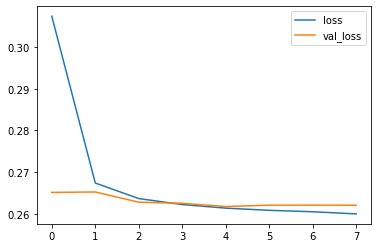

In [88]:
losses[['loss','val_loss']].plot()

# Evaluating Model Performance

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:

predictions = (model.predict(X_test) > 0.5).astype(int)

2471/2471 [==============================] - 3s 1ms/step


In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [92]:
confusion_matrix(y_test,predictions)

array([[ 6745,  8913],
       [   18, 63368]], dtype=int64)

In [93]:
import random
random.seed(42)
random_ind = random.randint(0,len(df))
new_customer = df.drop('loan_status',axis=1).iloc[random_ind]
new_customer

loan_amnt      22000.00
term              36.00
int_rate           6.62
installment      675.49
annual_inc     77431.00
                 ...   
30723              0.00
48052              1.00
70466              0.00
86630              0.00
93700              0.00
Name: 335936, Length: 78, dtype: float64

In [94]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [95]:
(model.predict(new_customer) > 0.5).astype(int)

1/1 [==============================] - 0s 30ms/step


array([[1]])

In [96]:
df.iloc[random_ind]['loan_status']

1.0

In [98]:
from tensorflow.keras.models import load_model
model.save('Loan_Eligibility_model.h5')